Found 697 files belonging to 9 classes.
['Cheetah', 'Hyena', 'Jaguar', 'Tiger', 'bear_png', 'chinkara', 'elephant', 'lion', 'pig']


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 5s 198ms/step - loss: 0.9712 - accuracy: 0.7977
Test Accuracy: 79.77%
Test Loss: 0.9712
1/1 [==============================] - 0s 200ms/step


<Figure size 1000x800 with 0 Axes>

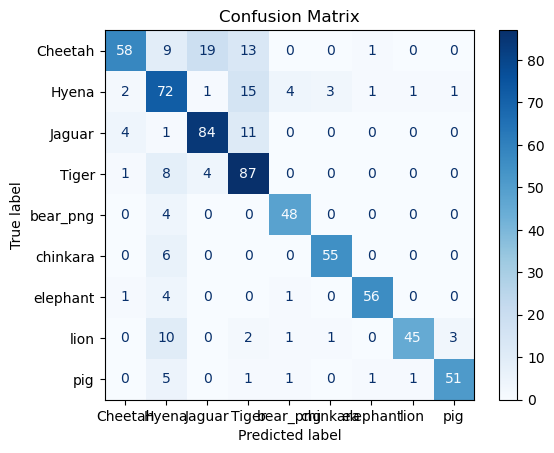

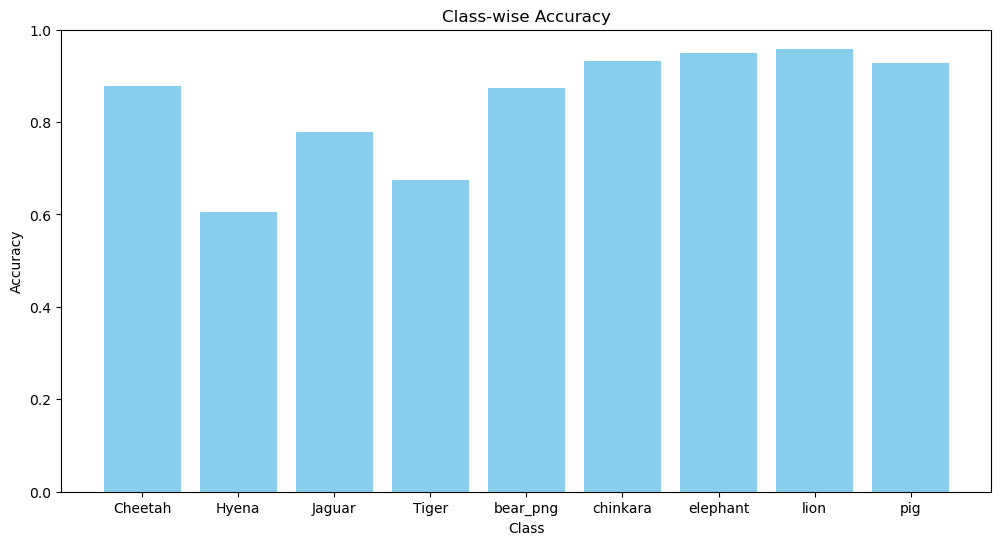

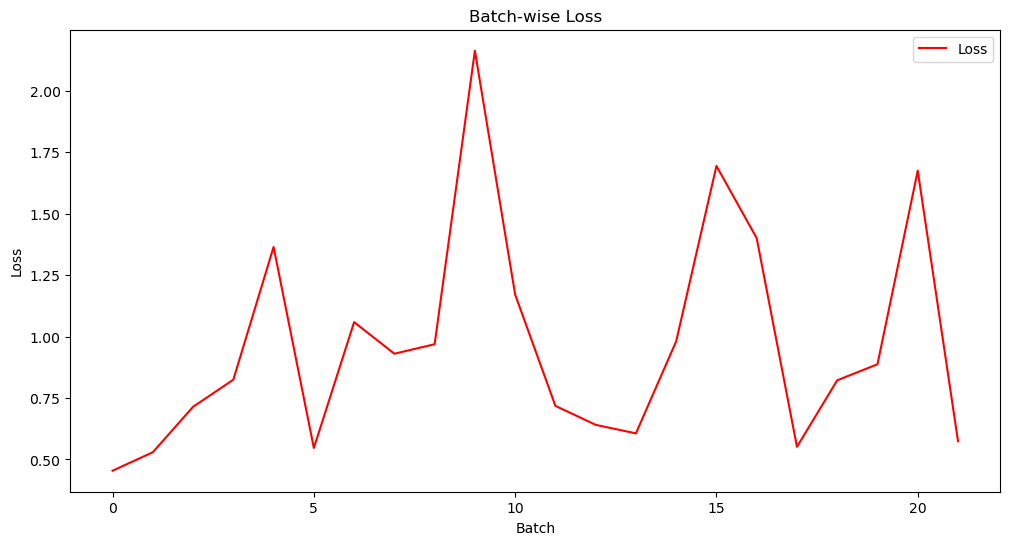

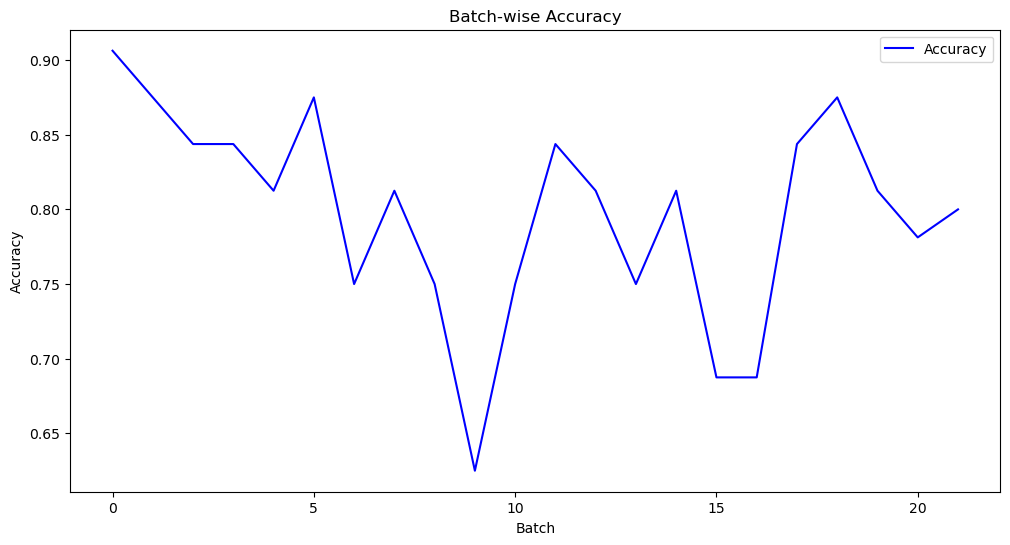

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load testing dataset
test_dataset_path = "C:\\Users\\ADMIN\\projests\\Wild-Animal-Detection-and-Alert-System-using-YOLO-v8-Model-main\\Animal_test_train_set\\Animals"  # Update this path to the location of your test dataset

test_ds = image_dataset_from_directory(
    test_dataset_path,
    seed=123,
    image_size=(180, 180),  # Make sure this matches the image size used in training
    batch_size=32
)

# Load the trained model
class_names = test_ds.class_names
print(class_names)

# Load the trained model
model = load_model("animal_intrusion.h5")
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Prepare to collect predictions and actual labels
all_predictions = []
all_labels = []

# Make predictions on the test dataset
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    all_predictions.extend(predicted_labels)
    all_labels.extend(labels.numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
report = classification_report(all_labels, all_predictions, target_names=class_names, output_dict=True)

# Extract class-wise accuracy
class_accuracies = [report[class_name]['precision'] for class_name in class_names]

# Plot class-wise accuracy
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_accuracies, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Prepare data for line plots
batch_losses = []
batch_accuracies = []

for images, labels in test_ds:
    batch_loss, batch_accuracy = model.evaluate(images, labels, verbose=0)
    batch_losses.append(batch_loss)
    batch_accuracies.append(batch_accuracy)

# Plot batch-wise loss
plt.figure(figsize=(12, 6))
plt.plot(batch_losses, label='Loss', color='red')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Batch-wise Loss')
plt.legend()
plt.show()

# Plot batch-wise accuracy
plt.figure(figsize=(12, 6))
plt.plot(batch_accuracies, label='Accuracy', color='blue')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Batch-wise Accuracy')
plt.legend()
plt.show()
